In [2]:
import os,sys
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/gdrive")

os.chdir("/content/gdrive/My Drive/Colab Notebooks/OpenCv")
sys.path.append("/content/gdrive/My Drive/Colab Notebooks/OpenCv")

Mounted at /content/gdrive


In [5]:
!pip3 install dlib


In [4]:
!pip3 install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566169 sha256=d64aff97702b6e4d3c6d70e4cf15c38bdaa888411e26babdeddb3b17deb3eabf
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [6]:
import face_recognition

In [7]:
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

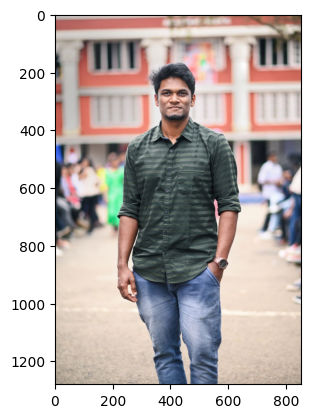

In [18]:
#loading ithe image
image = cv2.imread('Asim.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [19]:
#findin all the faces in the image
face_locations = face_recognition.face_locations(image)
number_of_faces= len(face_locations)
print("found {} faces in the output image".format(number_of_faces))

found 1 faces in the output image


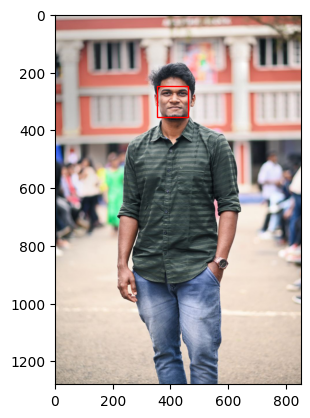

In [20]:
#get axis handle
plt.imshow(image)

#getting the current axis or gca

ax=plt.gca()

#repeating for all the faces
for face_location in face_locations:
  top,right,bottom,left=face_location
  x,y,w,h = left,top,right,bottom
  rect= Rectangle((x,y),w-x,h-y,fill=False, color='red')
  ax.add_patch(rect)
plt.show()

In [58]:
#face manipulation

image1=face_recognition.load_image_file('Asim.jpg')
face_landmarks_list= face_recognition.face_landmarks(image1)
number_of_landmarks= len(face_landmarks_list)
print("found {} landmarks in the output image".format(number_of_landmarks))

found 1 landmarks in the output image


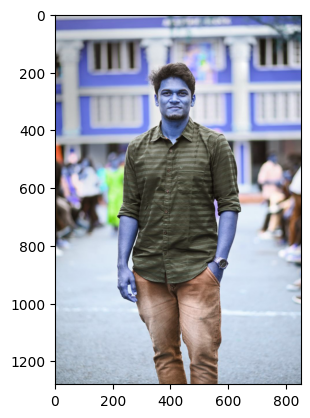

In [21]:
#image read
image=cv2.imread('Asim.jpg')
Asim = cv2.cvtColor(image,cv2.COLOR_BGRA2RGB)
plt.imshow(image)

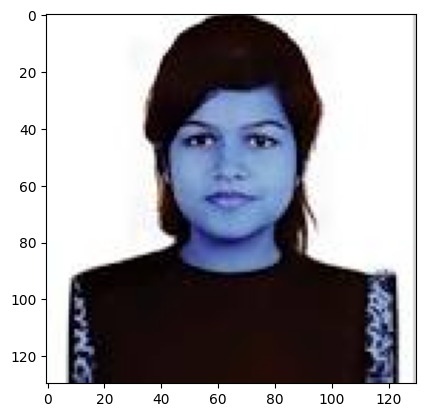

In [41]:
image=cv2.imread('kannapi.jpeg')
Kannan = cv2.cvtColor(image,cv2.COLOR_BGRA2RGB)
plt.imshow(image)

In [43]:
Asim_encoding= face_recognition.face_encodings(Asim)[0]
Kannan_encoding= face_recognition.face_encodings(Kannan)[0]

In [44]:
#database

known_face_encoding=[Asim_encoding,Kannan_encoding]

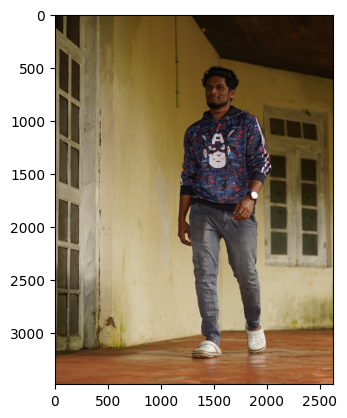

In [45]:
image=cv2.imread('Asim1.JPG')
unknown_image=cv2.cvtColor(image,cv2.COLOR_BGRA2RGB)
plt.imshow(unknown_image)
unknown_image_encoding=face_recognition.face_encodings(unknown_image)

In [46]:
import numpy as np

from scipy.spatial import distance
for unknown_face_encoding in unknown_image_encoding:
  results=[]
  for known_face_encoding in known_face_encoding:
    d= distance.euclidean(known_face_encoding,unknown_face_encoding)
    results.append(d)
  threshold=0.6
  results=np.array(results)<= threshold
  name = "unknown"
  if results[0]:
    name="ASIM THAHA"
  elif results[1]:
    name="Kannapi"
print(f"found {name} in the photo")

found ASIM THAHA in the photo


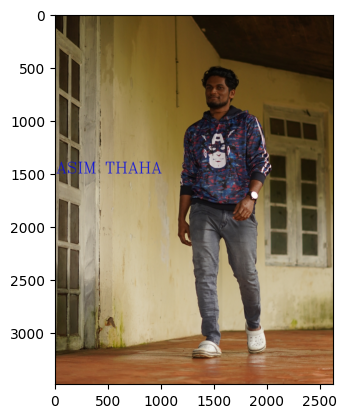

In [48]:
#display name on the image

font=cv2.FONT_HERSHEY_COMPLEX
text=cv2.putText(unknown_image,name,(10,1500),font,5,(11,15,224),4,cv2.LINE_AA)
plt.imshow(text)